# Comparison of ensembling many cluster labels vs multi-start method to get best cluster labels

In [19]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})

sys.path.append('../src')
import rccr

Generate simulated data

Case Study #1


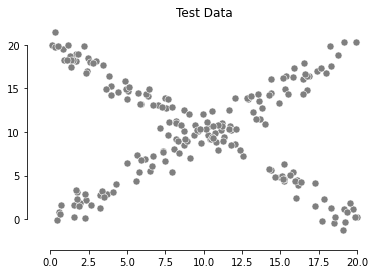

In [2]:
print('Case Study #1')
np.random.seed(25)
n = 100
x1 = np.random.uniform(0, 20, size=n)
x2 = np.random.uniform(0, 20, size=n)
y1 = x1 + np.random.normal(size=n)
y2 = 20 -x2 + np.random.normal(size=n)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
data = np.vstack([x, y]).T
sns.scatterplot(x=x, y=y, color='tab:grey', s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Test Data')
plt.show()




obtain cluster labels

In [4]:
ensemble_labels = rccr.get_average_clusters(x.reshape(-1,1),y, n_clusters=2, iterations=16,max_iteration_cluster=5, plot=False)
all_ensemble_labels = rccr.get_possible_clusters(x.reshape(-1,1),y,labels=ensemble_labels,scoring='MAE')
ensemble_labels_array = OneHotEncoder(sparse=False).fit_transform(ensemble_labels.reshape(-1,1))
ensemble_labels_multiple_possibilities = ensemble_labels_array+all_ensemble_labels
ensemble_labels_multiple_possibilities[ensemble_labels_multiple_possibilities==2] = 1


best_labels = rccr.get_best_clusters(x.reshape(-1,1),y, n_clusters=2, iterations=16,max_iteration_cluster=5, plot=False)
all_best_labels = rccr.get_possible_clusters(x.reshape(-1,1),y,labels=best_labels,scoring='MAE')
best_labels_array = OneHotEncoder(sparse=False).fit_transform(best_labels.reshape(-1,1))
best_labels_multiple_possibilities = best_labels_array+all_best_labels
best_labels_multiple_possibilities[best_labels_multiple_possibilities==2] = 1

Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Iteration 0 0.13967046853777432
Iteration 0 0.8945312457188584
Iteration 0 0.8666222354440993
Iteration 0 0.13798287725635577
Iteration 1 0.6728183323866104
Iteration 1 0.9687736985240357
Iteration 1 0.9687736985240357
Iteration 1 0.536743643690758
Iteration 2 0.9687736985240357
Iteration 2 0.9687736985240357
Iteration 2 0.9687736985240357
Iteration 2 0.9683170574190259
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Iteration 0 0.27100410612428183
Iteration 0 0.9327521784625001
Iteration 0 0.8560382903347689
Iteration 0 0.17366013071563774
Iteration 1 0.965

/Users/isaiahbetinol/opt/anaconda3/envs/rcluster/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Iteration 0 0.8666222354440993
Iteration 0 0.13798287725635577
Iteration 0 0.8945312457188584
Iteration 0 0.13967046853777432
Iteration 1 0.9687736985240357
Iteration 1 0.9687736985240357
Iteration 1 0.6728183323866104
Iteration 1 0.536743643690758
Iteration 2 0.9687736985240357
Iteration 2 0.9687736985240357
Iteration 2 0.9683170574190259
Iteration 2 0.9687736985240357
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Iteration 3 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Final r2 0.9687736985240357
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Initial r2 0.02351637658017225
Iteration 0 0.9327521784625001
Iteration 0 0.27100410612428183
Iteration 0 0.8560382903347689
Iteration 0 0.17366013071563774
Iteration 1 0.968

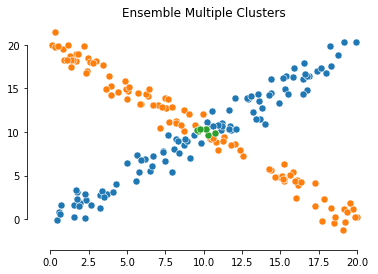

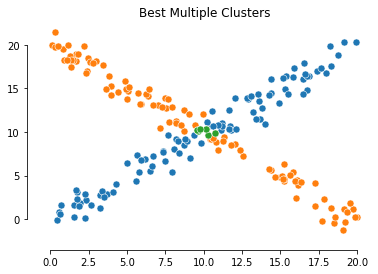

In [6]:
indx0 = ensemble_labels_multiple_possibilities[:,0] == 1
indx1 = ensemble_labels_multiple_possibilities[:,1] == 1
indx2 = np.add(ensemble_labels_multiple_possibilities[:,0],ensemble_labels_multiple_possibilities[:,1]) == 2
sns.scatterplot(x=x[indx0], y=y[indx0], s=50, alpha=1)
sns.scatterplot(x=x[indx1], y=y[indx1], s=50, alpha=1)
sns.scatterplot(x=x[indx2], y=y[indx2], s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Ensemble Multiple Clusters')
plt.show()

indx0 = best_labels_multiple_possibilities[:,0] == 1
indx1 = best_labels_multiple_possibilities[:,1] == 1
indx2 = np.add(best_labels_multiple_possibilities[:,0],best_labels_multiple_possibilities[:,1]) == 2
sns.scatterplot(x=x[indx0], y=y[indx0], s=50, alpha=1)
sns.scatterplot(x=x[indx1], y=y[indx1], s=50, alpha=1)
sns.scatterplot(x=x[indx2], y=y[indx2], s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Best Multiple Clusters')
plt.show()

Case Study #2

Case Study #2


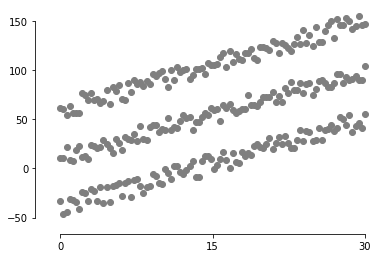

In [9]:
print('Case Study #2')

x  = np.linspace(0, 30, 100)
y1 = 3*x -50 + 20*np.random.random(size=len(x))
y2 = 3*x -0 + 20*np.random.random(size=len(x))
y3 = 3*x +50 + 20*np.random.random(size=len(x))

x = np.concatenate((x,x,x))
y = np.concatenate((y1,y2,y3))

plt.scatter(x=x, y=y, color='tab:grey')
plt.xticks([0,15,30])
plt.yticks([-50,0,50,100, 150])
sns.despine(offset=10, trim=True)
plt.show()


get labels

In [12]:
ensemble_labels = rccr.get_average_clusters(x.reshape(-1,1),y, n_clusters=3, iterations=16,max_iteration_cluster=5, plot=False)
all_ensemble_labels = rccr.get_possible_clusters(x.reshape(-1,1),y,labels=ensemble_labels,scoring='MAE')
ensemble_labels_array = OneHotEncoder(sparse=False).fit_transform(ensemble_labels.reshape(-1,1))
ensemble_labels_multiple_possibilities = ensemble_labels_array+all_ensemble_labels
ensemble_labels_multiple_possibilities[ensemble_labels_multiple_possibilities==2] = 1


best_labels = rccr.get_best_clusters(x.reshape(-1,1),y, n_clusters=3, iterations=16,max_iteration_cluster=5, plot=False)
all_best_labels = rccr.get_possible_clusters(x.reshape(-1,1),y,labels=best_labels,scoring='MAE')
best_labels_array = OneHotEncoder(sparse=False).fit_transform(best_labels.reshape(-1,1))
best_labels_multiple_possibilities = best_labels_array+all_best_labels
best_labels_multiple_possibilities[best_labels_multiple_possibilities==2] = 1

Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Iteration 0 0.7080835226199557
Iteration 0 0.6910041136017048
Iteration 0 0.618244034459089
Iteration 0 0.7106290644579091
Iteration 1 0.826771022624523
Iteration 1 0.8571263767263909
Iteration 1 0.8573415988258651
Iteration 1 0.8375910495098072
Iteration 2 0.8300763518655491
Iteration 2 0.9259626263677553
Iteration 2 0.8440114921810298
Iteration 2 0.9197805809765214
Iteration 3 0.8343225009698281
Iteration 3 0.9542721882814152
Iteration 3 0.8533111643529594
Iteration 3 0.9542721882814152
Final r2 0.8392120511508212
Final r2 0.9542721882814152
Final r2 0.911344202979992
Final r2 0.9542721882814152
Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Initial r2 0.04147115675646277
Iteration 0 0.749181552764525
Iteration 0 0.787380544258857
Iteration 0 0.7614249414737538
Iteration 0 0.7305447711979148
Iteration 1 0.84349698936

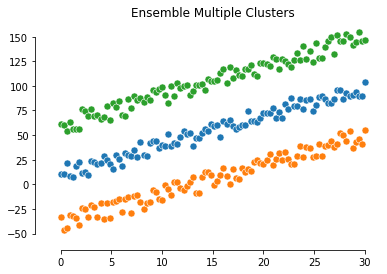

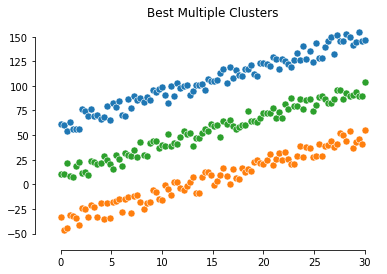

In [17]:
indx0 = ensemble_labels_multiple_possibilities[:,0] == 1
indx1 = ensemble_labels_multiple_possibilities[:,1] == 1
indx2 = ensemble_labels_multiple_possibilities[:,2] == 1
sns.scatterplot(x=x[indx0], y=y[indx0], s=50, alpha=1)
sns.scatterplot(x=x[indx1], y=y[indx1], s=50, alpha=1)
sns.scatterplot(x=x[indx2], y=y[indx2], s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Ensemble Multiple Clusters')
plt.show()

indx0 = best_labels_multiple_possibilities[:,0] == 1
indx1 = best_labels_multiple_possibilities[:,1] == 1
indx2 = best_labels_multiple_possibilities[:,2] == 1
sns.scatterplot(x=x[indx0], y=y[indx0], s=50, alpha=1)
sns.scatterplot(x=x[indx1], y=y[indx1], s=50, alpha=1)
sns.scatterplot(x=x[indx2], y=y[indx2], s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Best Multiple Clusters')
plt.show()